# Analysis of Mutations from the iSEE database

https://github.com/haddocking/iSee 

In [1]:
import numpy as np
import pandas as pd


datafile = 'features_training_dataset_top1.tsv'
df = pd.read_table(datafile)
df

,mutationID,ddGexp,Evdw_wt,Eelec_wt,BSA_wt,Edesolv_wt,Evdw_diff,Eelec_diff,BSA_diff,Edesolv_diff,...,F,P,S,T,W,Y,V,PSSM_wt,PSSM_diff,PSSMic
0,1A22_A_SER51ALA,0.348,-108.9220,-548.471,2945.12,-19.7933,-6.1680,-3.597,95.75,5.4491,...,0,-1,4,0,-3,-2,-1,4,-2,0.37
1,1A22_A_PHE165ALA,0.410,-108.9220,-548.471,2945.12,-19.7933,1.9270,-64.325,-15.57,2.7238,...,6,-5,-4,-4,0,7,-3,6,-10,1.52
2,1A22_A_SER62ALA,0.155,-108.9220,-548.471,2945.12,-19.7933,-5.3180,13.752,-85.13,-3.0679,...,-1,-2,2,4,-3,-2,0,2,-2,0.34
3,1A22_A_ILE168ALA,0.806,-108.9220,-548.471,2945.12,-19.7933,3.1230,-18.701,-54.58,7.0656,...,-1,-4,-3,-1,5,-2,5,3,-5,0.77
4,1A22_A_GLN22ALA,-0.220,-108.9220,-548.471,2945.12,-19.7933,1.3490,12.259,8.08,-10.8950,...,-2,-3,-2,-1,-3,-2,-2,6,-8,0.74
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,4CPA_B_VAL37ALA,2.320,-47.5841,-165.948,1284.70,-40.5247,3.4899,-16.966,44.48,1.3486,...,-1,-3,-2,0,-3,-1,4,4,-4,0.40
1098,4CPA_B_TYR36PHE,0.000,-47.5841,-165.948,1284.70,-40.5247,4.3875,-23.940,6.71,1.3360,...,4,-3,-2,-2,5,5,-1,5,-1,0.61
1099,4CPA_B_VAL37PHE,0.000,-47.5841,-165.948,1284.70,-40.5247,-3.6513,-17.270,50.46,-2.7785,...,-1,-3,-2,0,-3,-1,4,4,-5,0.40
1100,4CPA_B_VAL37LEU,1.280,-47.5841,-165.948,1284.70,-40.5247,-1.1825,-34.388,3.78,1.2285,...,-1,-3,-2,0,-3,-1,4,4,-3,0.40


/var/folders/tx/wwsd51jj247d8523pg4bttp80000gr/T/ipykernel_40007/3721943174.py:8: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  hist_counts, bin_edges = np.histogram(dlog10K, bins=100, normed=True)


Gaussian mean, std 0.8191257341634537 1.7406879455128013
Cauchy cmean, cscale 0.5317821781632405 0.7044802526825915
Conversion to $\Delta$ log_10 Kd


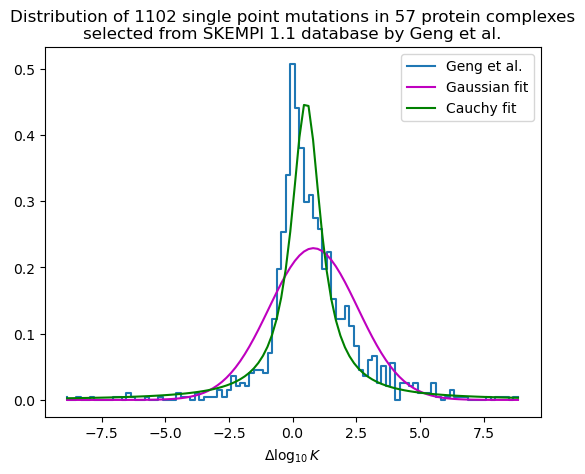

In [36]:
ddG_in_kcal_per_mol = df['ddGexp']
R = 8.314 * 0.001 / 4.184 # (J/K/mol)(1 kJ/ 1000 J)(1 kcal/4.184 J) = kcal/mol/K
T = 298.15 # K
dlog10K = ddG_in_kcal_per_mol/(R*T*(np.log(10.0)))

from matplotlib import pyplot as plt

hist_counts, bin_edges = np.histogram(dlog10K, bins=100, normed=True)
bin_centers = (bin_edges[0:-1] + bin_edges[1:])/2.0

mean, std = np.mean(dlog10K), np.std(dlog10K)
print('Gaussian mean, std', mean, std)

from scipy.stats import cauchy
# Calculate the first four moments:
cmean, cscale = cauchy.fit(dlog10K)
print('Cauchy cmean, cscale', cmean, cscale)

plt.figure()
plt.step(bin_centers,hist_counts, label='Geng et al.')
# plt.plot([mean,mean], [0, np.max(hist_counts)], 'r-')
gaussian = (1./np.sqrt(2.0*np.pi*std**2))*np.exp( -(bin_centers - mean)**2 / (2.0*std**2))
cdist = (1./np.pi)*cscale/((bin_centers - cmean)**2  + cscale**2)
plt.plot(bin_centers, gaussian, 'm-', label='Gaussian fit')
plt.plot(bin_centers, cdist, 'g-', label='Cauchy fit')
plt.xlabel('$\Delta \log_{10} K$')
plt.legend(loc='best')
plt.title('Distribution of 1102 single point mutations in 57 protein complexes\nselected from SKEMPI 1.1 database by Geng et al.')

print('Conversion to $\Delta$ log_10 Kd')


### help(cauchy.fit)


mean, var, skew, kurt = cauchy.stats(moments='mvsk')
print(mean, var, skew, kurt)